In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
df = pd.read_csv("C:\\Users\\lebak\\Datasets\\OnlineRetail.csv", encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [12]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [31]:
df.isna().sum()


InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [29]:
df.UnitPrice = df.UnitPrice.fillna(0).astype('int64')
df.UnitPrice.dtypes

dtype('int64')

In [28]:
df['CustomerID']= df['CustomerID'].fillna(0).astype('int64')
df.CustomerID.dtypes


dtype('int64')

In [34]:
duplicate = df.duplicated()
sum(duplicate)# finding the duplicates

5284

In [39]:
df1 = df.drop_duplicates()
duplicate = df1.duplicated()
sum(duplicate)# removing the duplicates

0

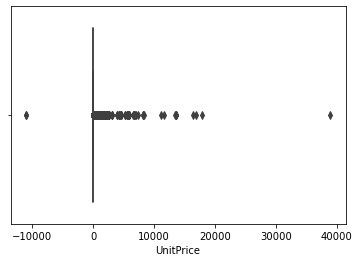

In [40]:
sns.boxplot(df1.UnitPrice)

In [41]:
from feature_engine.outliers import Winsorizer

In [43]:
winsor = Winsorizer(capping_method='iqr', tail = 'both', fold = 1.5, variables=['UnitPrice'])


In [44]:
df1=winsor.fit_transform(df1)

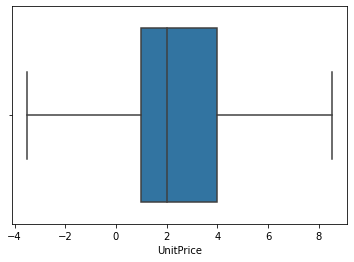

In [45]:
sns.boxplot(df1.UnitPrice)